In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import scipy as sc
import numpy.linalg as npl
from numpy.linalg import norm
import scipy.linalg as scl
from scipy.spatial.distance import pdist,squareform
import ase
from tqdm import tqdm_notebook as tqdm_cs

In [3]:
from tools import manipulation_hist,manipulation_LJ_force,manipulation_Harmonique_force,manipulation_LJ,get_numerical_force,manipulation_Harmonique
from tools import visualiser_trajectoire,faire_une_chaine_circulaire,faire_une_chaine_lineaire

from Exercise_functions import simulateur_NVT_efficace as simulateur_NVT

# Construire un système initial et le visualiser

L'integrateur à besoin de commencer à partir d'un état initial du système: positions et vitesses. Pour générer des positions compatible avec la transition entre un état globulaire et un état élongé voici deux fonctions qui produisent une chaine circulaire et une chaine linéaire. Note que pour générer des configurations initiales stable il est important de prendre en compte le paramètre $r_m$ qui correspond à la longueure d'équilibre associée au potentiel de Lennard Jones et harmonique. 

Optionel et avancé: Ecrit une autre fonction pour générer des configurations initiales stables. 

In [4]:
view = visualiser_trajectoire([faire_une_chaine_circulaire(N=10,r_m=1.5)],1)
view

NGLWidget()

In [5]:
view = visualiser_trajectoire([faire_une_chaine_lineaire(N=10,r_m=1)],1)
view

NGLWidget()

# Test l'implementation des forces et de l'integrateur

L'implementation complète de l'integration des équations du mouvement de la chaine de polymère est fournie dans le fichier Exercise_functions.py. Pour mieux comprendre les différents composants de ce modèle, on va commencer par tester chacune de ses charactéristiques indépendament.

## Test potentiel de Lennard Jones sans exitation thermique

In [4]:
# Intensite de l'atractration de LJ
epsilon = 10.
# Distance d'equilibre pour le potentiel
r_m = 1.
# Masse des particules
masse = 1.
# Pas de temps entre chaque etapes d'integration
dt = 0.001

# Temperature du system
T = 0
# Rigidite du ressort
k_spring = 0.
# Genere les positions initiales
positions_initiales = faire_une_chaine_lineaire(10,r_m)
# Genere les vitesses initiales
vitesses_initiales = np.zeros(positions_initiales.shape)
vitesses_initiales[:,0] = 2 * np.ones(vitesses_initiales.shape[0]) * np.array(([-1,1]*int(vitesses_initiales.shape[0]/2)))

In [5]:
pos,vel,diagnostic = simulateur_NVT(positions_initiales,vitesses_initiales,masse=masse,r_m=r_m,epsilon=epsilon,
                           k_spring=k_spring,temperature=T,
                           Nstep=5000,dt=dt)

L'énergie du système est-elle conservée ?

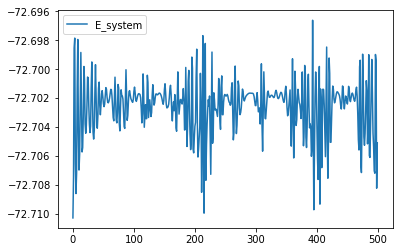

In [6]:
plt.plot(diagnostic['E_system'],label='E_system',)
plt.legend()

In [7]:
visualiser_trajectoire(pos,10)

NGLWidget(count=50)

## Test le potentiel de Harmonique sans exitation thermique

In [101]:
# Rigidite du ressort
k_spring = 1.
# Distance d'equilibre pour le potentiel
r_m = 1.
# Masse des particules
masse = 1.
# Pas de temps entre chaque etapes d'integration
dt = 0.001
# Temperature du system
T = 0
# Intensite de l'atractration de LJ
epsilon = 0.
# Genere les positions initiales
positions_initiales = faire_une_chaine_lineaire(10,r_m)
# Genere les vitesses initiales
vitesses_initiales = np.random.normal(loc=0.0, scale=np.sqrt(0.5),size=positions_initiales.shape)

In [102]:
pos,vel,diagnostic = simulateur_NVT(positions_initiales,vitesses_initiales,masse=masse,r_m=r_m,epsilon=epsilon,
                           k_spring=k_spring,temperature=T,
                           Nstep=5000,dt=dt)

HBox(children=(IntProgress(value=0, max=5000), HTML(value='')))

L'énergie du système est-elle conservée ?

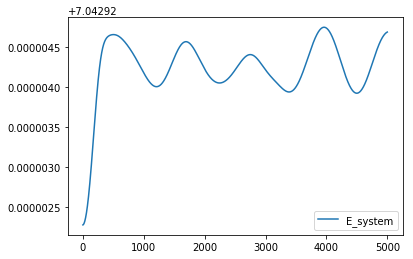

In [103]:
plt.plot(diagnostic['E_system'],label='E_system',)
plt.legend()

In [104]:
visualiser_trajectoire(pos,10)

NGLWidget(count=500)

## Test Avec l'effet de la temperature

In [43]:
# Rigidite du ressort
k_spring = 1.
# Intensite de l'atractration de LJ
epsilon = 1.
# Distance d'equilibre pour le potentiel
r_m = 1.
# Masse des particules
masse = 1.
# Pas de temps entre chaque etapes d'integration
dt = 0.001
# Temperature du system
T = 1.

# Genere les positions initiales
positions_initiales = faire_une_chaine_lineaire(10,r_m)
# Genere les vitesses initiales
vitesses_initiales = np.random.normal(loc=0.0, scale=np.sqrt(1),size=positions_initiales.shape)

In [44]:
pos,vel,diagnostic = simulateur_NVT(positions_initiales,vitesses_initiales,masse=masse,r_m=r_m,epsilon=epsilon,
                                       k_spring=k_spring,temperature=T,Nstep=5000,dt=dt)

HBox(children=(IntProgress(value=0, max=5000), HTML(value='')))

La variarion d'energie du system et du thermostat est-elle conservée ?

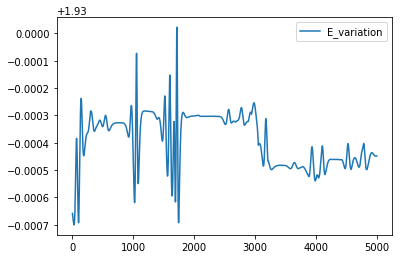

In [45]:
plt.plot(diagnostic['E_variation'],label='E_variation',)
plt.legend()

La temperature du system est-elle maintenue a la bone valeure

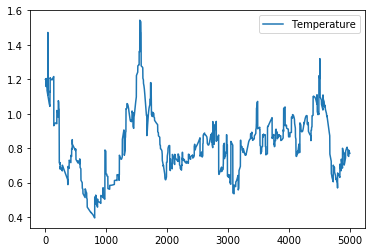

In [111]:
plt.plot(diagnostic['Temperature'],label='Temperature',)
plt.legend()

In [112]:
visualiser_trajectoire(pos,10)

NGLWidget(count=500)

# Simule la transition entre l'état globulaire et l'état alongé

In [8]:
# Intensite de l'atractration de LJ
epsilon = 1.
# Distance d'equilibre pour le potentiel
r_m = 1.
# Masse des particules
mass = 1.
# Pas de temps entre chaque etapes d'integration
dt = 0.01
# Temperature du system
T = 6.

# Rigidite du ressort. La rigidite du ressort est exprime en fonction de epsilon et de r_m pour que la forme du potentiel harmonique coincide avec celle du puit du potentiel de Lennard Jones
k_spring = 16.67 * epsilon / r_m**2

# Genere les positions initiales
positions_initiales = faire_une_chaine_circulaire(100,r_m)
# Genere les vitesses initiales
vitesses_initiales = np.random.normal(loc=0.0, scale=np.sqrt(.1),size=positions_initiales.shape)

In [115]:
pos,vel,diagnostic = simulateur_NVT(positions_initiales,vitesses_initiales,masse=mass,r_m=r_m,epsilon=epsilon,
                           k_spring=k_spring,temperature=T,Nstep=50000,dt=dt,enregistrement_stride=10)

HBox(children=(IntProgress(value=0, max=50000), HTML(value='')))

In [88]:
visualiser_trajectoire(pos,1)

NGLWidget(count=5000)

des diagnostics

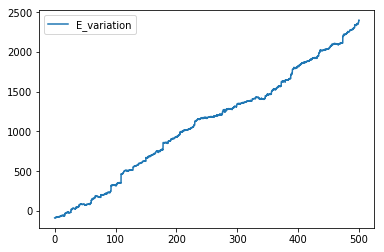

In [89]:
plt.plot(diagnostic['time'],diagnostic['E_variation'],label='E_variation',)
plt.legend()

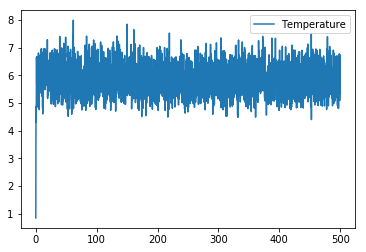

In [90]:
plt.plot(diagnostic['time'],diagnostic['Temperature'],label='Temperature',)
plt.legend()

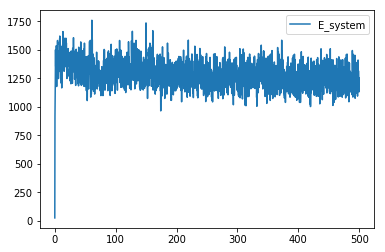

In [91]:
plt.plot(diagnostic['time'],diagnostic['E_system'],label='E_system',)
plt.legend()

## Analyser les trajectoires et detecter la transition entre l'état globulaire et l'état élongé à partir d'une longue simulation (au moins Nstep=200000 et dt=0.01)

Quelle est la température de transition entre l'état globulaire et l'état élongé ?

Comment mesurer dans quel état est le système ? Ecrit une fonction pour analyser la séquence de positions généré par le simulateur et determiner automatiquement dans quel état se trouve le système.

Combien de fois est-ce que cette transition à lieu pendant la simulation ?
